In [1]:
from littlefish.core import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
simulation_folder = r"F:\little_fish_simulation_logs_3"
min_generation = 0
max_generation = 16

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [3]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000000, 1 / 17 ...
reading generation_0000001, 2 / 17 ...
reading generation_0000002, 3 / 17 ...
reading generation_0000003, 4 / 17 ...
reading generation_0000004, 5 / 17 ...
reading generation_0000005, 6 / 17 ...
reading generation_0000006, 7 / 17 ...
reading generation_0000007, 8 / 17 ...
reading generation_0000008, 9 / 17 ...
reading generation_0000009, 10 / 17 ...
reading generation_0000010, 11 / 17 ...
reading generation_0000011, 12 / 17 ...
reading generation_0000012, 13 / 17 ...
reading generation_0000013, 14 / 17 ...
reading generation_0000014, 15 / 17 ...
reading generation_0000015, 16 / 17 ...
reading generation_0000016, 17 / 17 ...


In [4]:
life_span_df

,generation,fish_name,life_span
0,0,b'fish_241104_23_46_53.077659',966
1,0,b'fish_241104_23_46_53.138290',394
2,0,b'fish_241104_23_46_53.197052',340
3,0,b'fish_241104_23_46_53.257229',5470
4,0,b'fish_241104_23_46_53.316366',134
...,...,...,...
16995,16,b'fish_241106_12_48_39.177080',8335
16996,16,b'fish_241106_12_48_39.990838',1620
16997,16,b'fish_241106_12_48_40.136716',289
16998,16,b'fish_241106_12_48_40.471794',63


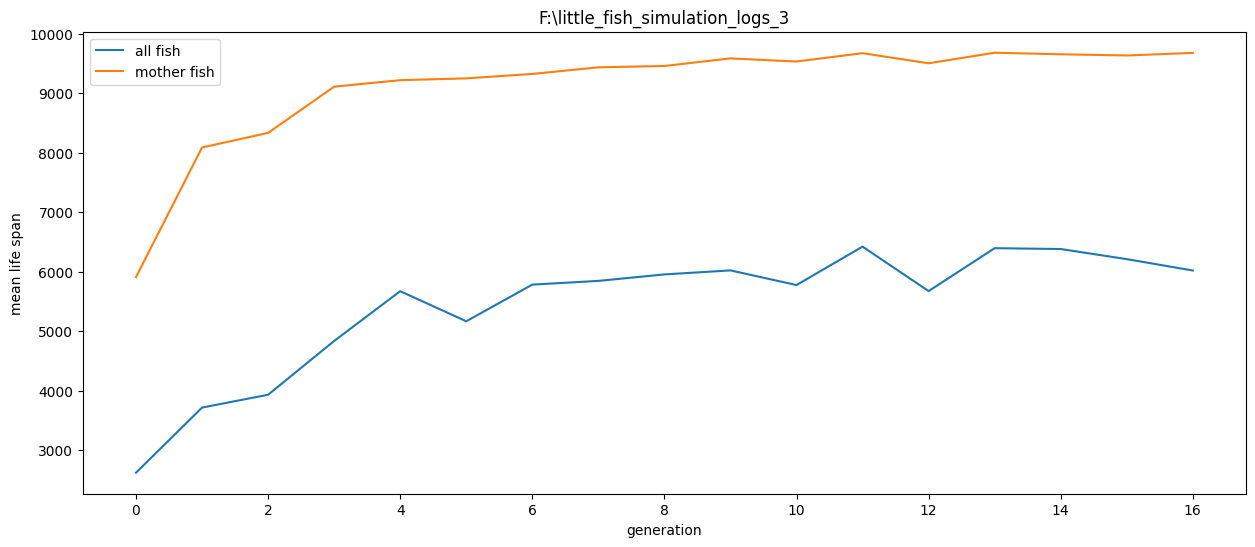

In [8]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_span = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_span.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_span, label="mother fish")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()


(0.0, 20000.0)

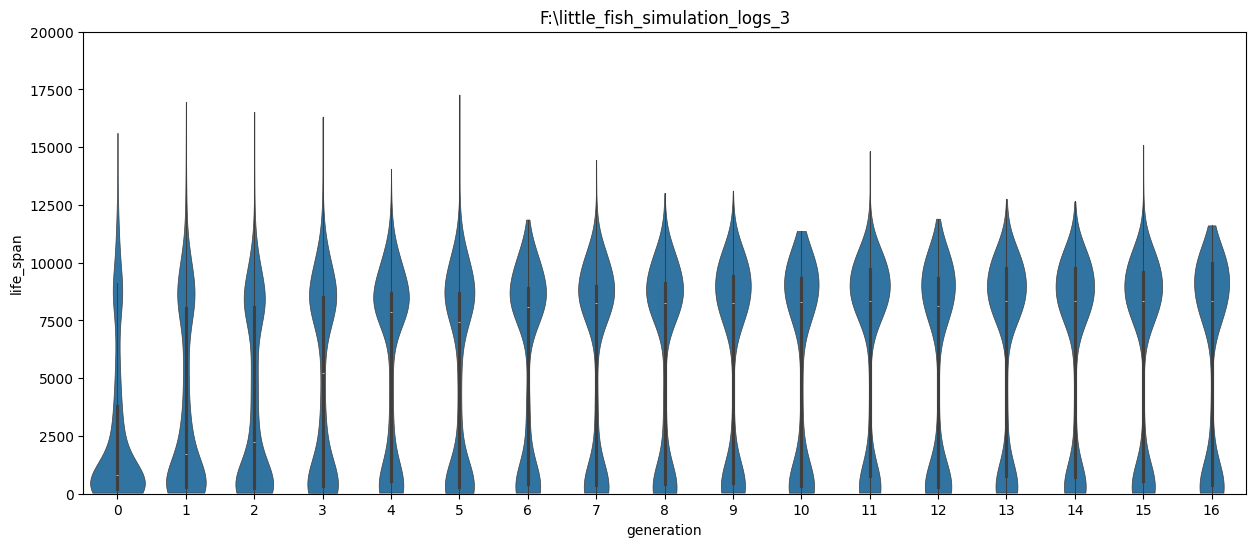

In [9]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 20000])

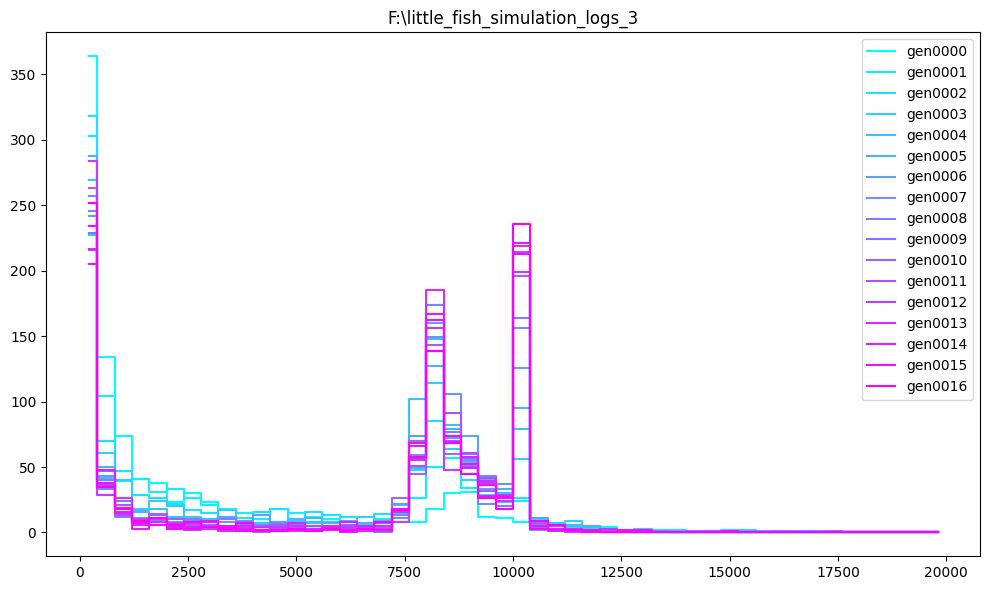

In [10]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=20000, bins=50,
)
ax.legend()
plt.tight_layout()